<a href="https://colab.research.google.com/github/tawfiqam/MI564/blob/main/Pandas_Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What is Pandas?

The pandas package is the most important tool at the disposal of Data Scientists and Analysts working in Python today. The powerful machine learning and glamorous visualization tools may get all the attention, but pandas is the backbone of most data projects [1]. 

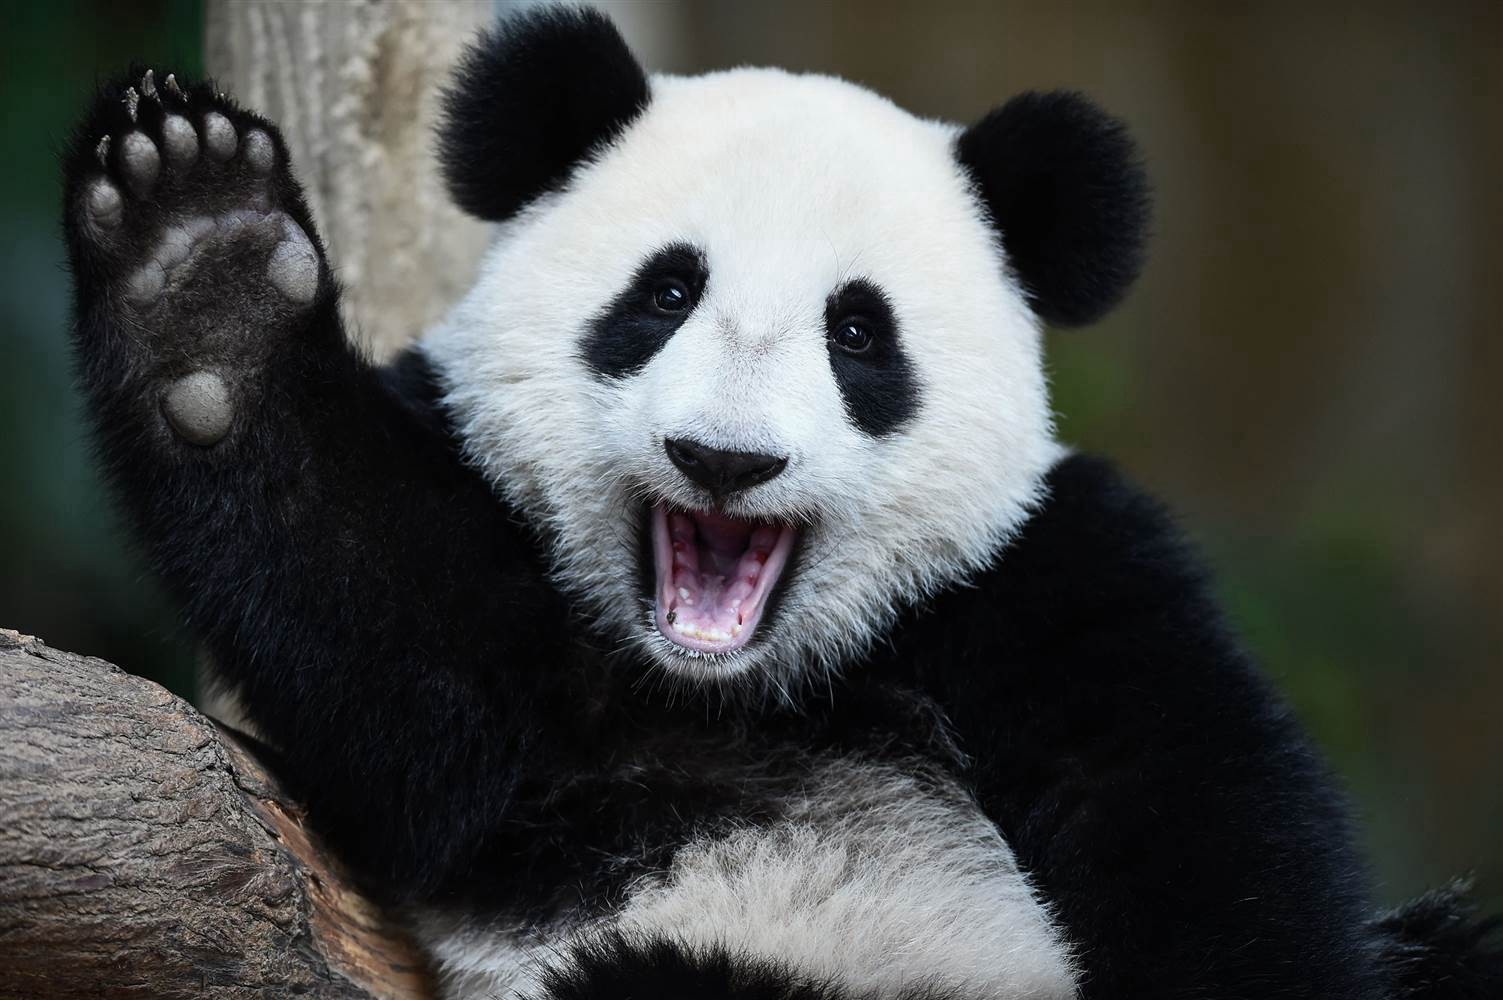

Pandas is derived from the term "panel data" which is an econometrics term for data sets that shows different readings over periods of time [2].  

**References** <br>
[1] https://www.learndatasci.com/tutorials/python-pandas-tutorial-complete-introduction-for-beginners/ <br> 
[2] McKinney, W. (2011). pandas: A foundational Python library for data analysis and statistics. Python for High Performance and Scientific Computing, 14(9), 1–9.


Things that can be done with a Pandas dataframe:

1.   Average, median, max, min or each column in the dataframe​
2.   Correlations between columns​
3.   Lookup different types of information about the data source
4.   What does the distribution of data look like?
5.   Clean data by removing or managing missing data 
6.   Store cleaned dataset as CSV, DB, JSON or other readable files




# Series and Dataframes

The two main components of pandas are Series and DataFrame. 

Basically, a Series is a column in a table. A DataFrame is a multi-dimensional table made up of a collection of series. 

Both DataFrames and Series are similar in that you can do similar operations in each such as filling missing values with zeros/summing values/calculating the means. 

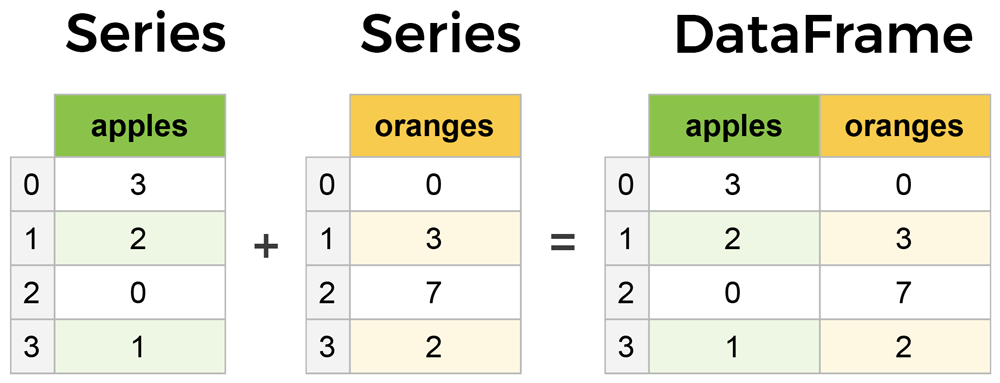

#Starting a DataFrame from scratch

One way to do so is starting with a dictionary. 

Remember the example from the earlier week where we saw differet fruits? In this dictionary, we show the different friuts:



In [1]:
fruits = {'apples':[3,2,0,1],
          'oranges':[0,3,4,5]
          }

OK...so, we have this dictionary...to understand what it means, if you want to see the data assocated with apples, you say...

In [2]:
fruits['apples']

[3, 2, 0, 1]

Alright...now, let's turn this into a Pandas DataFrame...

In [3]:
#import the Pandas python package
import pandas as pd
#now create the fruits dataframe
fruits_df = pd.DataFrame(fruits)

Now, let's take a look at this new dataframe...

In [4]:
fruits_df

,apples,oranges
0,3,0
1,2,3
2,0,4
3,1,5


Notice how now the data is arranged in a table

Now, let's say that we want to know who has what fruit...This basically means that we want to name the index instead of the default numbering...

In [5]:
divided_fruits_df = pd.DataFrame(data=fruits, index=['Tawfiq','John','Sawant','Lily'])

In [6]:
divided_fruits_df

,apples,oranges
Tawfiq,3,0
John,2,3
Sawant,0,4
Lily,1,5


Now you can locate a customer's order using the index or name...so, if you wanted to know what fruits Tawfiq has...

In [7]:
divided_fruits_df.loc['Tawfiq']

apples     3
oranges    0
Name: Tawfiq, dtype: int64

Apparently...Tawfiq only has apples!!

#Reading and writing to files

In [8]:
#First, you have to write this code to mount Google drive. 
#Then, you will have to upload the file you want to your drive so you can read it. 
#You can also write to this drive when you are saveing a file
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Writing out the divided fruit dataframe

In [9]:
divided_fruits_df.to_csv('DividedFruits.csv')

Now, let's test if we can read it again to make sure that we saved the file in the correct fashion

In [10]:
test_df = pd.read_csv('DividedFruits.csv')

In [11]:
test_df.head()

,Unnamed: 0,apples,oranges
0,Tawfiq,3,0
1,John,2,3
2,Sawant,0,4
3,Lily,1,5


Woppps! Kinda looks the same. But the index is called Unnamed:0. 
This problem is common only when reading from csv

You can resolve this by adding index_col=0, which removes the Unnamed: 0 column

In [12]:
test_df = pd.read_csv('DividedFruits.csv', index_col=0)

In [13]:
test_df

,apples,oranges
Tawfiq,3,0
John,2,3
Sawant,0,4
Lily,1,5


Cool. How about another method that is used to save data often, JSON. What is JSON you may ask? 

JSON is a text-based data format following JavaScript object syntax. Do not worry. You do not need to learn a new language! JSON can and is often used independently from JavaScript.

JSON is stored as a string. This is important when you want to store/share large datasets. 

OK. So, let's try to save the dataframe as json


Source: https://developer.mozilla.org/en-US/docs/Learn/JavaScript/Objects/JSON

In [14]:
test_df.to_json('DividedFruits.json')

Now, let's take at look at how a json file looks like...

`{"apples":{"Tawfiq":3,"John":2,"Sawant":0,"Lily":1},"oranges":{"Tawfiq":0,"John":3,"Sawant":4,"Lily":5}}`

So, it basically looks like a dictionary.

OK. Let's try to read it again


In [15]:
test_df = pd.read_json('DividedFruits.json')

In [16]:
test_df.head()

,apples,oranges
Tawfiq,3,0
John,2,3
Sawant,0,4
Lily,1,5


# Reading a big dataset - Movies DB

When you have a big dataset, one thing you'd want to do is to explore it to see what the data "looks like"

In [17]:
movies_df = pd.read_csv("IMDB-Movie-Data.csv", index_col="Title")

In [18]:
#let's see the number of rows in this DataFrame
len(movies_df)

1000

In [19]:
#let's take a look the top five records...
movies_df.head()

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [20]:
#Let's take a look at the last five records in the DataFrame
movies_df.tail()

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Secret in Their Eyes,996,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
Hostel: Part II,997,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
Step Up 2: The Streets,998,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
Search Party,999,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0
Nine Lives,1000,"Comedy,Family,Fantasy",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,"Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...",2016,87,5.3,12435,19.64,11.0


## Exploring the DataFrame
OK. Let's try to do a little more to describe our DataFrame

In [21]:
#getting some general info about your dataset
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, Guardians of the Galaxy to Nine Lives
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Genre               1000 non-null   object 
 2   Description         1000 non-null   object 
 3   Director            1000 non-null   object 
 4   Actors              1000 non-null   object 
 5   Year                1000 non-null   int64  
 6   Runtime (Minutes)   1000 non-null   int64  
 7   Rating              1000 non-null   float64
 8   Votes               1000 non-null   int64  
 9   Revenue (Millions)  872 non-null    float64
 10  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(4)
memory usage: 93.8+ KB


What the above tells us is that in this dataframe, there are 11 columns. The 11 columns are listed in the table (starting with 0). 

The **number of non-null values** are also shown. Notice that Revenue and Metascore are both missing for a subset of the data. So, there are some movies for which these data are not available. We will talk later about how pandas give you some tools to "impute" these values. Imputation is the process of replacing missing data with substituted values.

The **Dtype** is the data type for each of the columns. So, this column says that Rank is an integer, so are the Year, Runtime, and Votes columns. The rating and Revenues though are floats (meaning that your the number can include fractions).



Next, you might want to see what the data looks like

In [22]:
movies_df.shape

(1000, 11)

What does this tell you? Well, in this DataFrame there are 1000 rows and 11 columns

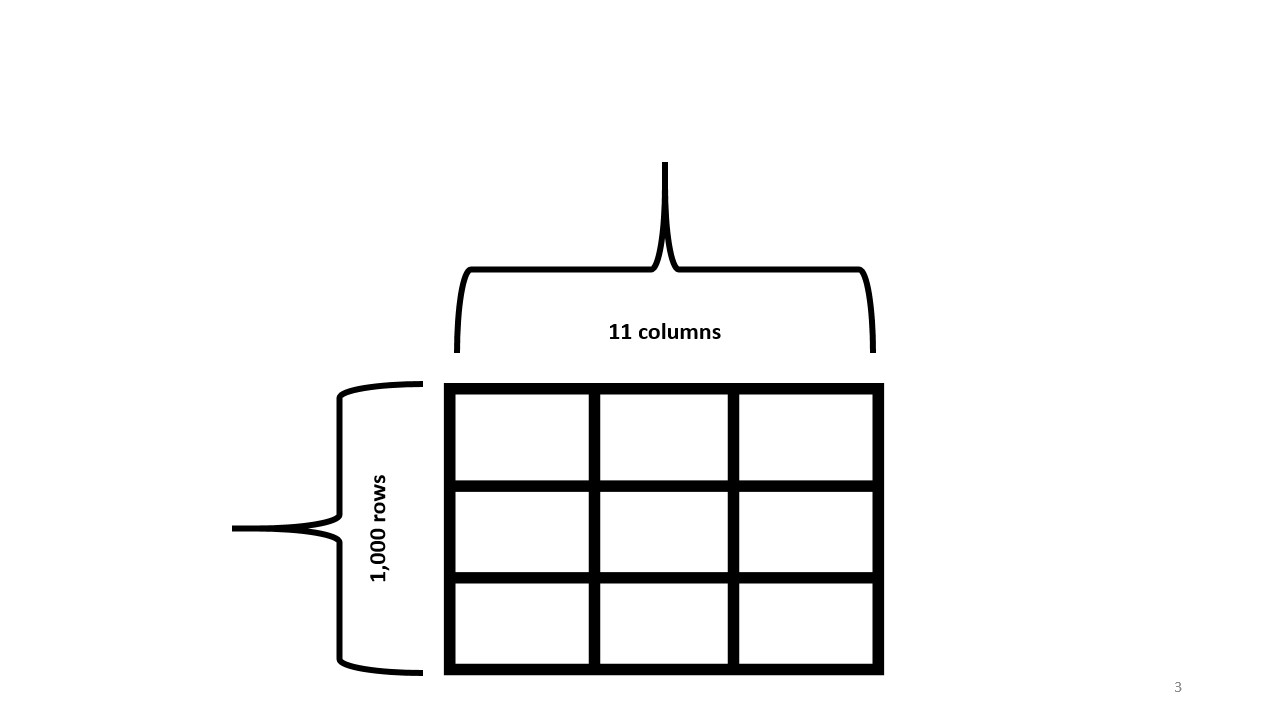

## Cleaning the DataFrame

Your DataFrame might not be perfect. Most of the time, they are not. Some of the issues you might have are:


1.   Duplicates: there are duplicate recrods (rows) that contain the same data..just repeated.
2.   Columns: column names or their data types might need to be corrected. 
3.   Incomplete data: some of your data points are incomplete. Cell #31 showed that some of the columns containts null values (nothing). 



###Handling duplicates (cleaning rows)
First, let's test how to deal with duplicats. In this case, we will create our own duplication by appending the same table twice to the dataset. 

In [23]:
#this command basically adds the same DataFrame to itself...basically doubling each row
duplicate_movies_df = movies_df.append(movies_df)

In [24]:
#let's see how this one looks like
duplicate_movies_df.shape

(2000, 11)

In [25]:
#But does this change anything when it comes to columns in this dataset?
duplicate_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, Guardians of the Galaxy to Nine Lives
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                2000 non-null   int64  
 1   Genre               2000 non-null   object 
 2   Description         2000 non-null   object 
 3   Director            2000 non-null   object 
 4   Actors              2000 non-null   object 
 5   Year                2000 non-null   int64  
 6   Runtime (Minutes)   2000 non-null   int64  
 7   Rating              2000 non-null   float64
 8   Votes               2000 non-null   int64  
 9   Revenue (Millions)  1744 non-null   float64
 10  Metascore           1872 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 187.5+ KB


As you can see, the shape of the DataFrame has changed. There are 1,000 new rows (because we just added them!) but there are not changes in the nature of the data under any of the columns. We did not do anything to change the columns so that makes sense. 

OK. Now that we determined that there duplicates in our DataFrame, how do we clean it by getting rif of them. Well, Pandas has your back, there is a drop_duplicates function that does this for you. Let's try it here, shall we

In [26]:
droped_duplicates_df = duplicate_movies_df.drop_duplicates()

In [27]:
#let's take a look at the shape of the dataframe after dropping duplicates
droped_duplicates_df.shape

(1000, 11)

The drop duplicates function is even better. You can make some adjustments as to what records get to be dropped. In this case, it was pretty clear, but what if we want to manage the following scenario:
You collected Tweets about #covid19 throughout the month of the August. You collected both the original tweet and any retweets. As you are doing your analysis, you decide that you only need to keep the first retweet. 

In this case, you add keep argument in the drop_duplicates funtion. The default for this argument is "first." This means that the first record is kept and the second disposed of. You could change that to "last," in which case the last record is kept and the first disposed of. 

In [28]:
drop_duplicates_df = duplicate_movies_df.drop_duplicates(keep='first')

In [29]:
#checking on the shape again
drop_duplicates_df.shape

(1000, 11)

OK. But what happens you might ask if we remove first or last from the keep argument. What if we said that keep = False? Care to venture a guess? 

In [30]:
drop_duplicates_df = duplicate_movies_df.drop_duplicates(keep=False)

In [31]:
#let's check now what the shape looks like
drop_duplicates_df.shape

(0, 11)

This is an empty DataFrame!! There are no records because there is a duplicate for each and we specified that no duplicate records are to be kept. 

Finally, there is one more function that might make this easier for you.
Instead of having to copy the DataFrame every time, you can just make the changes in place 

In [32]:
duplicate_movies_df.drop_duplicates(inplace=True)

In [33]:
#checking the duplicate_movies_df dataframe. Now it shold also be a (1000,11) shape
duplicate_movies_df.shape

(1000, 11)

###Cleaning Columns

In [34]:
#first, if you want to read all the columns in your dataset, you use:
movies_df.columns

Index(['Rank', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

Suppose that we want to change the column Runtime (Minutes) to just be Runtime. This is probably easier to show when you're working with your dataset and presenting it to others. 

In this case, you will use the dename function

In [35]:
movies_df.rename(columns={'Runtime (Minutes)':'Runtime','Revenue (Millions)':'Revenue_millions'}, inplace=True)

In [36]:
movies_df.head()

,Rank,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue_millions,Metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [37]:
movies_df.columns = [col.lower() for col in movies_df]

In [38]:
movies_df.head()

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


##Handling incomplete data

There are two options in dealing with nulls:

1.   Get rid of rows or columns with nulls
2.   Replace nulls with non-null values, a technique known as imputation

Recall that when we first used the describe() function, we found that there are missing values in the revenue and metascore columns. Let's see other Pandas functions that deal with this issue.



In [39]:
movies_df.isnull()

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,False,False,False,False,False,False,False,False,False,False,False
Prometheus,False,False,False,False,False,False,False,False,False,False,False
Split,False,False,False,False,False,False,False,False,False,False,False
Sing,False,False,False,False,False,False,False,False,False,False,False
Suicide Squad,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
Secret in Their Eyes,False,False,False,False,False,False,False,False,False,True,False
Hostel: Part II,False,False,False,False,False,False,False,False,False,False,False
Step Up 2: The Streets,False,False,False,False,False,False,False,False,False,False,False


But this is not very helpful! Let's try to get the sum of all null values in a column...

In [40]:
movies_df.isnull().sum()

rank                  0
genre                 0
description           0
director              0
actors                0
year                  0
runtime               0
rating                0
votes                 0
revenue_millions    128
metascore            64
dtype: int64

As you can see, revenue (128) and metascore (64) are the two columns with null values

####Removing null values in DataFrame rows

Now, we want to create a new DataFrame where any row with a null value is removed



In [41]:
movies_no_null_rows_df = movies_df.dropna()

In [42]:
#let's take a look at the new DataFrame's shape
movies_no_null_rows_df.shape

(838, 11)

So, 162 rows have been removed, but the columns have not changed

In [43]:
movies_no_null_rows_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 838 entries, Guardians of the Galaxy to Nine Lives
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              838 non-null    int64  
 1   genre             838 non-null    object 
 2   description       838 non-null    object 
 3   director          838 non-null    object 
 4   actors            838 non-null    object 
 5   year              838 non-null    int64  
 6   runtime           838 non-null    int64  
 7   rating            838 non-null    float64
 8   votes             838 non-null    int64  
 9   revenue_millions  838 non-null    float64
 10  metascore         838 non-null    float64
dtypes: float64(3), int64(4), object(4)
memory usage: 78.6+ KB


####Removing null values in DataFrame columns

Now, we want to create a new DataFrame where any **column** with a null value is removed

In [44]:
movies_no_null_columns_df = movies_df.dropna(axis=1)

In [45]:
#let's take a look at the columns again
#note that metascore and revenue are removed
movies_no_null_columns_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, Guardians of the Galaxy to Nine Lives
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rank         1000 non-null   int64  
 1   genre        1000 non-null   object 
 2   description  1000 non-null   object 
 3   director     1000 non-null   object 
 4   actors       1000 non-null   object 
 5   year         1000 non-null   int64  
 6   runtime      1000 non-null   int64  
 7   rating       1000 non-null   float64
 8   votes        1000 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 78.1+ KB


In order to understand why we used axis=1, remember how the DataFrame shape looks like. It is a tuple with the 0 index showing the rows and the 1 index showing the columns, thus columns (axis=1). 

If you see the shape of the DataFrame after removing the columns, it should look like **(1000,9)**

Let's check....

In [46]:
movies_no_null_columns_df.shape

(1000, 9)

####Impuation

What if we did not want to remove all these rows/columns from the DataFrame when there are missing data points. Instead, we can impute that null values with other values - a zero, the mean or the median of values in that column.

Let's impute the missing values in the revenue_millions column

In [47]:
#first, let's get the mean for the revenue_millions column
#there are two ways to call a column, either use the [brackets] or .
#so, this would be revenue_mean = movies_df.revenue_millions.mean()
revenue_mean = movies_df['revenue_millions'].mean()

In [48]:
revenue_mean

82.95637614678897

In [49]:
#now that we have the mean value, let's impute it in the DataFrame
#just as with duplicates, we can use the inplace argument as well
movies_df.revenue_millions.fillna(revenue_mean,inplace=True)

In [50]:
#Let's check on the null values
movies_df.isnull().sum()

rank                 0
genre                0
description          0
director             0
actors               0
year                 0
runtime              0
rating               0
votes                0
revenue_millions     0
metascore           64
dtype: int64

As you can see from the above, now there are only null values in the revenue_millions column

#Exploring the variables in the DataFrame

1.   Use the describe function to get a summary of the data in the DataFrame
2.   Slicing, selecting, and extracting from a DataFrame





##General DataFrame descriptions

In [51]:
movies_df.describe()

,rank,year,runtime,rating,votes,revenue_millions,metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,96.412043,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,17.442500,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,60.375000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,99.177500,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


As you can see, the count (1000 since we have 1000 rows), mean, standard deviation, minimum, maximum, and the quartiles

You can also desribe columns

In [52]:
movies_df['genre'].describe()

count                        1000
unique                        207
top       Action,Adventure,Sci-Fi
freq                           50
Name: genre, dtype: object

This means that in the 1,000 rows the genre column has 207 unique values, the top value is Action/Adventure/Sci-Fi, which shows up 50 times (freq). 

Let's drill into this a little more. What is the next top genre? What is the number of times it was repeated?

In [53]:
movies_df['genre'].value_counts().head()

Action,Adventure,Sci-Fi    50
Drama                      48
Comedy,Drama,Romance       35
Comedy                     32
Drama,Romance              31
Name: genre, dtype: int64

The next genre is Drama at a count of 48

How about a we take a quick look at correlations to figure out if there are some relationships between columns. Correlatios represent the degree to which a pair of variables are linearly related. Positive numbers indicate a positive correlation — one goes up the other goes up — and negative numbers represent an inverse correlation — one goes up the other goes down. 1.0 indicates a perfect correlation.

In [54]:
movies_df.corr()

,rank,year,runtime,rating,votes,revenue_millions,metascore
rank,1.000000,-0.261605,-0.221739,-0.219555,-0.283876,-0.252996,-0.191869
year,-0.261605,1.000000,-0.164900,-0.211219,-0.411904,-0.117562,-0.079305
runtime,-0.221739,-0.164900,1.000000,0.392214,0.407062,0.247834,0.211978
rating,-0.219555,-0.211219,0.392214,1.000000,0.511537,0.189527,0.631897
votes,-0.283876,-0.411904,0.407062,0.511537,1.000000,0.607941,0.325684
revenue_millions,-0.252996,-0.117562,0.247834,0.189527,0.607941,1.000000,0.133328
metascore,-0.191869,-0.079305,0.211978,0.631897,0.325684,0.133328,1.000000


So now, looking at the correlation between metascore and rating at (0.63), meaning that the higher the rating the higher the metascore. Similarly, at a correlation of 0.607, it seems that the more the votes, the more the revenue. 

##Slicing, selecting, and extracting

Up until now we've focused on some basic summaries of our data. We've learned about simple column extraction using single brackets, and we imputed null values in a column using fillna(). Below are the other methods of slicing, selecting, and extracting you'll need to use constantly.

It's important to note that, although many methods are the same, DataFrames and Series have different attributes, so you'll need be sure to know which type you are working with or else you will receive attribute errors.

###By column

In [55]:
#let's go back to the genre column
genre_col = movies_df['genre']

In [56]:
#let's check the type
type(genre_col)

pandas.core.series.Series

So, a Pandas DataFrame column is a Series as we introduced early on in this notebook. But, you can still select this column and make changes to it as though it were a DataFrame. To do so, all you have to do in nest the brackets.

In [57]:
genre_col = movies_df[['genre']]

In [58]:
type(genre_col)

pandas.core.frame.DataFrame

OK. So, let's create a portion of the DataFrame that shows the genre and ratings

In [59]:
subset = movies_df[['genre','rating','revenue_millions']]
subset.head()

,genre,rating,revenue_millions
Title,,,
Guardians of the Galaxy,"Action,Adventure,Sci-Fi",8.1,333.13
Prometheus,"Adventure,Mystery,Sci-Fi",7.0,126.46
Split,"Horror,Thriller",7.3,138.12
Sing,"Animation,Comedy,Family",7.2,270.32
Suicide Squad,"Action,Adventure,Fantasy",6.2,325.02


You could also want to see the unique values in a particular column. For example, maybe we want to know who the unique authors are...

In [60]:
movies_df.director.unique()

array(['James Gunn', 'Ridley Scott', 'M. Night Shyamalan',
       'Christophe Lourdelet', 'David Ayer', 'Yimou Zhang',
       'Damien Chazelle', 'Sean Foley', 'James Gray', 'Morten Tyldum',
       'David Yates', 'Theodore Melfi', 'Gareth Edwards', 'Ron Clements',
       'Nacho Vigalondo', 'Chris Renaud', 'Mel Gibson', 'Paul Greengrass',
       'Garth Davis', 'Denis Villeneuve', 'Stephen Gaghan',
       'Kenneth Lonergan', 'Ben Young', 'Walt Dohrn', 'Roland Emmerich',
       'Dominique Abel', 'S.S. Rajamouli', 'Phillip Guzman', 'Jon Lucas',
       'Justin Kurzel', 'John Hamburg', 'Tom Ford', 'Bryan Singer',
       'Tim Miller', 'Paul W.S. Anderson', 'Anthony Russo',
       'Christopher Nolan', 'Scott Derrickson', 'Antoine Fuqua',
       'Patrick Read Johnson', 'Greg Tiernan', 'Barry Jenkins',
       'Shawn Burkett', 'John Lee Hancock', 'Ricardo de Montreuil',
       'Rob Marshall', 'John Madden', 'Scott Hicks', 'Justin Lin',
       'Sean Penn', 'J.J. Abrams', 'Anna Foerster', 'Garry Mar

In [61]:
#and getting the number of unique authors
#So, for the 1,000 movies, there are only 644 unique directors
len(movies_df.director.unique())

644

##By Row

For rows, we have two options:

    .loc - locates by name
    .iloc- locates by numerical index

In [62]:
prometheus = movies_df.loc['Prometheus']
prometheus

rank                                                                2
genre                                        Adventure,Mystery,Sci-Fi
description         Following clues to the origin of mankind, a te...
director                                                 Ridley Scott
actors              Noomi Rapace, Logan Marshall-Green, Michael Fa...
year                                                             2012
runtime                                                           124
rating                                                              7
votes                                                          485820
revenue_millions                                               126.46
metascore                                                          65
Name: Prometheus, dtype: object

iloc works on the numerical index 

In [63]:
movie_subset = movies_df.iloc[1:4]
movie_subset

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0


###Conditional selections

We’ve gone over how to select columns and rows, but what if we want to make a conditional selection?

For example, what if we want to filter our movies DataFrame to show only films directed by Ridley Scott or films with a rating greater than or equal to 8.0?


In [64]:
RidleyScott = movies_df[movies_df['director']=='Ridley Scott']

In [65]:
RidleyScott.head()

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
The Martian,103,"Adventure,Drama,Sci-Fi",An astronaut becomes stranded on Mars after hi...,Ridley Scott,"Matt Damon, Jessica Chastain, Kristen Wiig, Ka...",2015,144,8.0,556097,228.43,80.0
Robin Hood,388,"Action,Adventure,Drama","In 12th century England, Robin and his band of...",Ridley Scott,"Russell Crowe, Cate Blanchett, Matthew Macfady...",2010,140,6.7,221117,105.22,53.0
American Gangster,471,"Biography,Crime,Drama","In 1970s America, a detective works to bring d...",Ridley Scott,"Denzel Washington, Russell Crowe, Chiwetel Eji...",2007,157,7.8,337835,130.13,76.0
Exodus: Gods and Kings,517,"Action,Adventure,Drama",The defiant leader Moses rises up against the ...,Ridley Scott,"Christian Bale, Joel Edgerton, Ben Kingsley, S...",2014,150,6.0,137299,65.01,52.0


In [66]:
HighlyRated = movies_df[movies_df['rating']>=8]

In [67]:
HighlyRated.head()

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
La La Land,7,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0
Hacksaw Ridge,17,"Biography,Drama,History","WWII American Army Medic Desmond T. Doss, who ...",Mel Gibson,"Andrew Garfield, Sam Worthington, Luke Bracey,...",2016,139,8.2,211760,67.12,71.0
Lion,19,"Biography,Drama",A five-year-old Indian boy gets lost on the st...,Garth Davis,"Dev Patel, Nicole Kidman, Rooney Mara, Sunny P...",2016,118,8.1,102061,51.69,69.0
Arrival,20,"Drama,Mystery,Sci-Fi",When twelve mysterious spacecraft appear aroun...,Denis Villeneuve,"Amy Adams, Jeremy Renner, Forest Whitaker,Mich...",2016,116,8.0,340798,100.50,81.0


But you could also create more complex conditions. For example, what if we wanted to find the movies that are directed by Ridley Scott or Christopher Nolan.

In this case, you will use the sign for the OR function ("|") between the two parts of the condition

In [68]:
movies_df[(movies_df['director'] == 'Christopher Nolan') | (movies_df['director'] == 'Ridley Scott')].head()

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Interstellar,37,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0
The Dark Knight,55,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
The Prestige,65,"Drama,Mystery,Sci-Fi",Two stage magicians engage in competitive one-...,Christopher Nolan,"Christian Bale, Hugh Jackman, Scarlett Johanss...",2006,130,8.5,913152,53.08,66.0
Inception,81,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0


But what if I wanted more than just the two? You can see what that the command can get really long and difficult to code. 

What if I wanted to add a third director, Yimou Zhang. 

In [69]:
movies_df[movies_df['director'].isin(['Christopher Nolan', 'Ridley Scott','Yimou Zhang'])].head()

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
The Great Wall,6,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42.0
Interstellar,37,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0
The Dark Knight,55,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
The Prestige,65,"Drama,Mystery,Sci-Fi",Two stage magicians engage in competitive one-...,Christopher Nolan,"Christian Bale, Hugh Jackman, Scarlett Johanss...",2006,130,8.5,913152,53.08,66.0


Let's say we want all movies that were released between 2005 and 2010, have a rating above 8.0, but made below the 25th percentile in revenue.

Here's how we could do all of that:

In [70]:
movies_df[
    ((movies_df['year'] >= 2005) & (movies_df['year'] <= 2010))
    & (movies_df['rating'] > 8.0)
    & (movies_df['revenue_millions'] < movies_df['revenue_millions'].quantile(0.25))
].head()

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
3 Idiots,431,"Comedy,Drama",Two friends are searching for their long lost ...,Rajkumar Hirani,"Aamir Khan, Madhavan, Mona Singh, Sharman Joshi",2009,170,8.4,238789,6.52,67.0
The Lives of Others,477,"Drama,Thriller","In 1984 East Berlin, an agent of the secret po...",Florian Henckel von Donnersmarck,"Ulrich Mühe, Martina Gedeck,Sebastian Koch, Ul...",2006,137,8.5,278103,11.28,89.0
Incendies,714,"Drama,Mystery,War",Twins journey to the Middle East to discover t...,Denis Villeneuve,"Lubna Azabal, Mélissa Désormeaux-Poulin, Maxim...",2010,131,8.2,92863,6.86,80.0
Taare Zameen Par,992,"Drama,Family,Music",An eight-year-old boy is thought to be a lazy ...,Aamir Khan,"Darsheel Safary, Aamir Khan, Tanay Chheda, Sac...",2007,165,8.5,102697,1.20,42.0


#Apply functions to DataFrames

If we want to apply a function to all the data in a DataFrame, we can apply() a function we wrote separately to the DataFrame. 

For example, we could use a function to convert movies with an 8.0 or greater to a string value of "good" and the rest to "bad" and use this transformed values to create a new column.


In [71]:
#setting up the function to change the ratings
def rating_function(x):
  if x>=8.0:
    return "good"
  else:
    return "bad"

Now, let's apply the function to the ratings column

In [72]:
movies_df['rating'] = movies_df['rating'].apply(rating_function)

In [73]:
movies_df.head()

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,good,757074,333.13,76.0
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,bad,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,bad,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,bad,60545,270.32,59.0
Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,bad,393727,325.02,40.0


So, I'll know to watch Guardians of the Galaxy but not Prometheus!! 

#Basics of visualizations: Plotting

In order to plot the data in DataFrames, we first have to include the requisite python libraries.

For categorical variables utilize Bar Charts and Boxplots. Categorical variables are those variables that can take a limited set of possible values. For example, integer ratings (see the Dtype for ratings in the DataFrame movies_df) are categorical varibles.

For continuous variables utilize Histograms, Scatterplots, Line graphs, and Boxplots. Continous variables are usually represeted as floats (see the Dtype for revenue in the DataFrame movies_df). 

In [74]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20, 'figure.figsize': (10, 8)}) # set font and plot size to be larger

Let's plot the relationship between ratings and revenue. All we need to do is call .plot() on movies_df with some info about how to construct the plot:

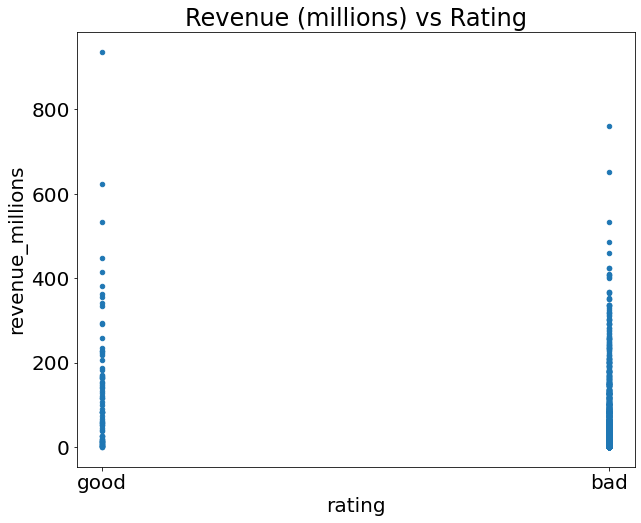

In [75]:
movies_df.plot(kind='scatter', x='rating', y='revenue_millions', title='Revenue (millions) vs Rating');

Remember that we changed the rating a number to Good/Bad...so, I will read the IMDB database oncre more...I will also change the column names and change the column names to lower case once more

In [76]:
movies_df = pd.read_csv("IMDB-Movie-Data.csv", index_col="Title")
movies_df.rename(columns={'Runtime (Minutes)':'Runtime','Revenue (Millions)':'Revenue_millions'}, inplace=True)
movies_df.columns = [col.lower() for col in movies_df]

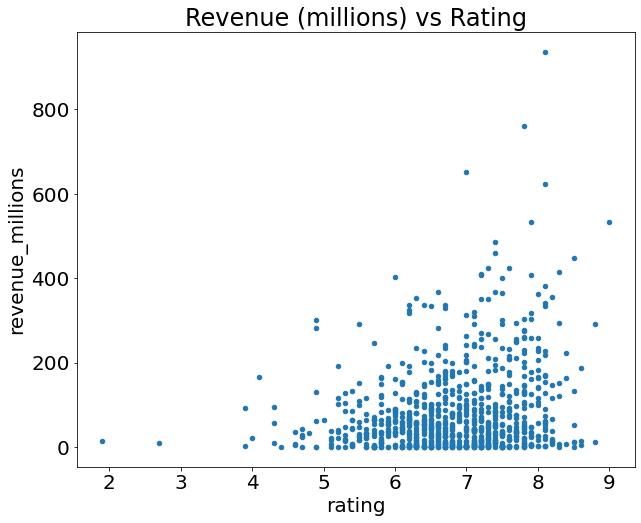

In [77]:
movies_df.plot(kind='scatter', x='rating', y='revenue_millions', title='Revenue (millions) vs Rating');

So, as expected, revenue is positively related to the rating. Remember that we also found a similar realationship betweem reneue and ratings when we tried correlations

What's with the semicolon? It's not a syntax error, just a way to hide the 

`<matplotlib.axes._subplots.AxesSubplot at 0x26613b5cc18> `

output when plotting in Jupyter notebooks. So, let's try again without the ;

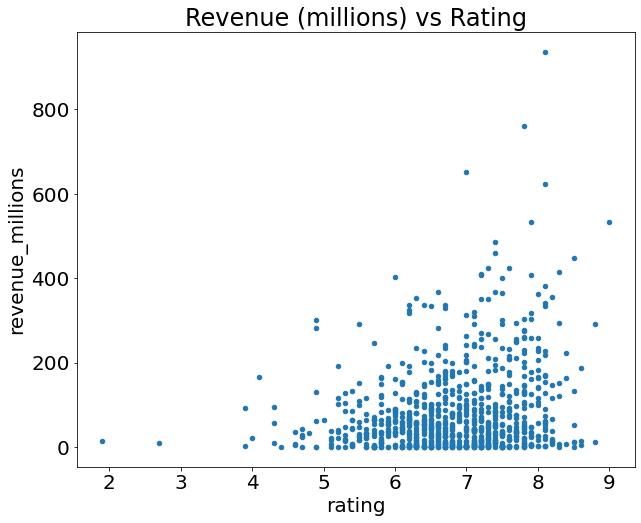

In [78]:
movies_df.plot(kind='scatter', x='rating', y='revenue_millions', title='Revenue (millions) vs Rating')

Now, let's do a histogram of the movie ratings...

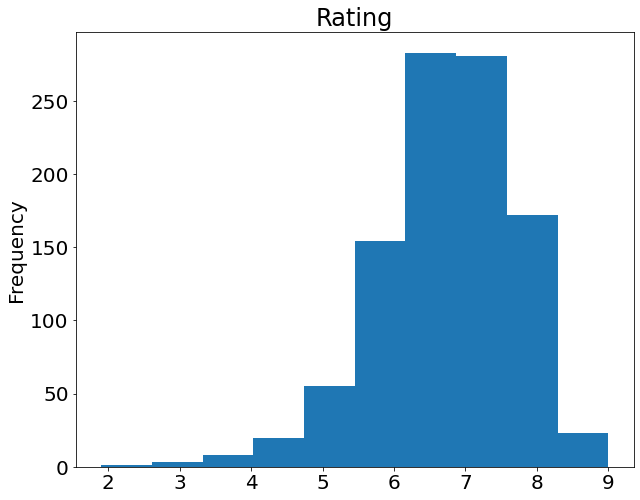

In [79]:
movies_df['rating'].plot(kind='hist', title='Rating');

Let's try describe again...

In [80]:
movies_df['rating'].describe()

count    1000.000000
mean        6.723200
std         0.945429
min         1.900000
25%         6.200000
50%         6.800000
75%         7.400000
max         9.000000
Name: rating, dtype: float64

And a Boxplot can visualize the data in describe(). 

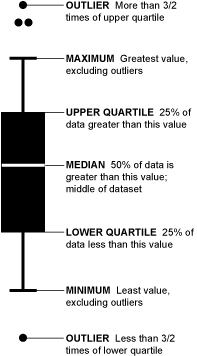


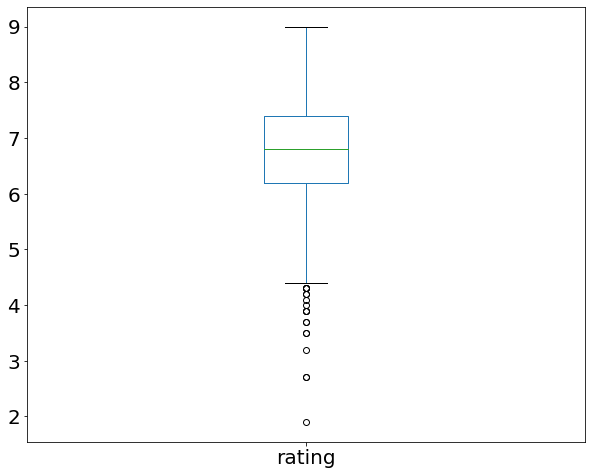

In [81]:
movies_df['rating'].plot(kind="box");

By **combining categorical and continuous data**, we can create a Boxplot of revenue that is grouped by the Rating Category we created above. So, we  can **compare the revenue of good and bad movies**. First, let's do the the apply rating_function againg to label
 good and bad movies. 

In [82]:
movies_df['rating'] = movies_df['rating'].apply(rating_function)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


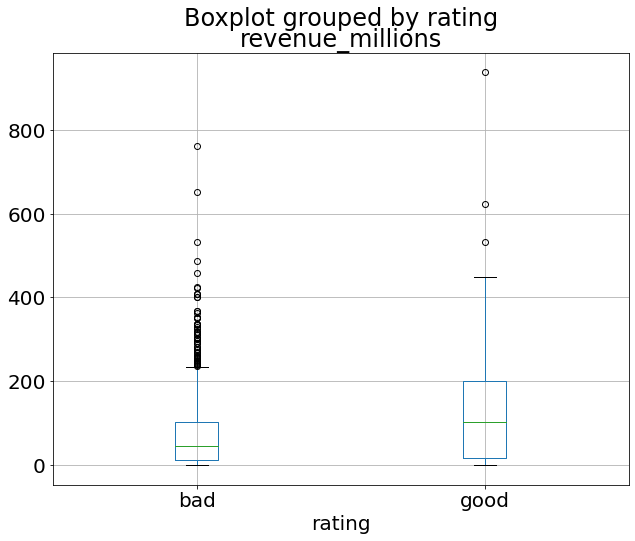

In [83]:
movies_df.boxplot(column='revenue_millions', by='rating');